# Regresi Linier

Analisis regresi linier digunakan untuk memprediksi nilai suatu variabel berdasarkan nilai variabel lain. Variabel yang ingin Anda prediksi disebut variabel dependen. Variabel yang Anda gunakan untuk memprediksi nilai variabel lain disebut variabel independen.

![](figs/fig1.jpg "Berbagai macam bentuk regresi linier")

Solusinya: Asumsi data adalah linear.

![](figs/fig2.jpg "formula garis")


![](figs/fig3.jpg "regresi linier")

Error dapat dihitung dengan membedakan selisih dari nilai prediksi dengan nilai awal (original).

![](figs/fig4.jpg "estimasi error")


Implementasi Python, kita dapat menggunakan statsmodels, https://www.statsmodels.org/.
```
pip install statsmodels
pip3 install statsmodels
```


Referense:
* https://www.alpharithms.com/simple-linear-regression-modeling-502111/

In [1]:
!pip install statsmodels

# Studi Kasus: Solusi Permasalahan Iklan Dengan Python - statsmodels

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ambil data
filename = 'datasets/Advertising.csv'
advert=pd.read_csv(filename)
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) adalah teknik umum untuk memperkirakan koefisien persamaan regresi linier yang menggambarkan hubungan antara satu atau lebih variabel kuantitatif independen dan variabel dependen.

### Sales dan TV

In [4]:
# Asumsi Model
# Model 1: Hubungan linier antara biaya iklan di TV dan penjualan
# yaitu Sales = f(TV)= alfa + beta*TV
# Dibuat paling cocok menggunakan metode least sum of square

model1=smf.ols(formula='Sales~TV',data=advert).fit()

In [ ]:
# model1=smf.ols(formula="quality~Q('fixed acidity')",data=df1).fit()

In [5]:
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [6]:
model1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [7]:
model1.rsquared

0.611875050850071

In [8]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.47e-42
Time:                        08:36:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Prediksi nilai penjualan berdasarkan persamaan 
sales_pred=model1.predict(pd.DataFrame(advert['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [10]:
sales_pred2 = 0.047537*advert['TV']+7.03
sales_pred2

0      17.968264
1       9.145397
2       7.847636
3      14.231856
4      15.624690
         ...    
195     8.845913
196    11.507985
197    15.444049
198    20.511493
199    18.063338
Name: TV, Length: 200, dtype: float64

In [12]:
# Hitung RMSE dan RSE untuk model 1 
advert['sales_pred']=sales_pred

# RMSE
advert['RSEd']=(advert['Sales']-advert['sales_pred'])**2
RSEd=advert.sum()['RSEd']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
sales_pred_mean=np.mean(advert['sales_pred'])
advert['RSEp']=(sales_pred_mean-advert['sales_pred'])**2
RSEp=advert.sum()['RSEp']
RSE=RSEd/RSEp

sales_mean = np.mean(advert['Sales'])
error=RMSE/sales_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(3.2423221486546887, 0.6343205996235858, 0.23122283106826091)

In [13]:
# pakai fungsi rmse
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_val = rmse(advert['Sales'], sales_pred)
rmse_val

3.2423221486546887

Text(0.5, 1.0, 'Predicted Sales vs TV Advertising Costs OLS')

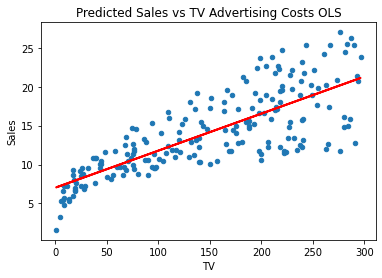

In [14]:
# Plot Penjualan yang diprediksi vs biaya Iklan TV 
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)
plt.title('Predicted Sales vs TV Advertising Costs OLS')


In [23]:
sales_pred3 = 0.047537*30+7.03
sales_pred3

8.45611

### Sales dan Radio

In [ ]:
advert['Radio']

In [ ]:
model2=smf.ols(formula='Sales~Radio',data=advert).fit()
model2.summary()


In [ ]:
sales_pred2=model2.predict(pd.DataFrame(advert['Radio']))
sales_pred2

In [ ]:
# Hitung RMSE dan RSE untuk model 2 
advert['sales_pred2']=sales_pred2

# RMSE
advert['RSEd2']=(advert['Sales']-advert['sales_pred2'])**2
RSEd=advert.sum()['RSEd2']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
sales_pred_mean=np.mean(advert['sales_pred2'])
advert['RSEp2']=(sales_pred_mean-advert['sales_pred2'])**2
RSEp=advert.sum()['RSEp2']
RSE=RSEd/RSEp

error=RMSE/sales_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

In [ ]:
# Plot the Sales predicted vs TV Advertising costs
advert.plot(kind='scatter', x='Radio', y='Sales')
plt.plot(pd.DataFrame(advert['Radio']),sales_pred2,c='red',linewidth=2)
plt.title('Predicted Sales vs Radio Advertising Costs - OLS')

### Sales dan Newspaper

In [ ]:
advert['Newspaper']

In [ ]:
model3=smf.ols(formula='Sales~Newspaper',data=advert).fit()
model3.summary()

In [ ]:
sales_pred3=model3.predict(pd.DataFrame(advert['Newspaper']))
sales_pred3

In [ ]:
# Hitung RMSE dan RSE untuk model 3 
advert['sales_pred3']=sales_pred3

# RMSE
advert['RSEd3']=(advert['Sales']-advert['sales_pred3'])**2
RSEd=advert.sum()['RSEd3']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
sales_pred_mean=np.mean(advert['sales_pred3'])
advert['RSEp3']=(sales_pred_mean-advert['sales_pred3'])**2
RSEp=advert.sum()['RSEp3']
RSE=RSEd/RSEp

error=RMSE/sales_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

In [ ]:
# Plot the Sales predicted vs TV Advertising costs
advert.plot(kind='scatter', x='Newspaper', y='Sales')
plt.plot(pd.DataFrame(advert['Newspaper']),sales_pred3,c='red',linewidth=2)
plt.title('Predicted Sales vs Newspaper Advertising Costs - OLS')

## Weighted Least Squares (WLS)

Ordinary Least Squares (OLS) dapat digunakan jika kita dapat mengasumsikan bahwa data kita homoscedastic. Weighted Least Squares (WLS) dapat digunakan ketika data Anda heteroscedastic (tetapi tidak berkorelasi).

### Sales dan TV

In [3]:
nsample = len(advert.index)
w = np.ones(nsample)
w[nsample * 6 // 10 :] = 3

In [4]:
model1=smf.wls(formula='Sales~TV',data=advert, weights=1.0 / (w ** 2)).fit()

In [5]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.632
Model:                            WLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     340.4
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           6.90e-45
Time:                        08:05:44   Log-Likelihood:                -554.36
No. Observations:                 200   AIC:                             1113.
Df Residuals:                     198   BIC:                             1119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1927      0.446     16.134      0.000       6.314       8.072
TV             0.0482      0.003     18.451      0.000       0.043       0.053
==============================================================================
Omnibus:                        7.453   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               12.248
Skew:                          -0.122   Prob(JB):                      0.00219
Kurtosis:                       4.187   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Prediksi nilai penjualan berdasarkan persamaan 
sales_pred=model1.predict(pd.DataFrame(advert['TV']))
sales_pred

0      18.280528
1       9.337002
2       8.021495
3      14.493022
4      15.904904
         ...    
195     9.033424
196    11.731901
197    15.721793
198    20.858538
199    18.376902
Length: 200, dtype: float64

In [7]:
# Hitung RMSE dan RSE untuk model 1 
advert['sales_pred']=sales_pred

# RMSE
advert['RSEd']=(advert['Sales']-advert['sales_pred'])**2
RSEd=advert.sum()['RSEd']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
sales_pred_mean=np.mean(advert['sales_pred'])
advert['RSEp']=(sales_pred_mean-advert['sales_pred'])**2
RSEp=advert.sum()['RSEp']
RSE=RSEd/RSEp

sales_mean = np.mean(advert['Sales'])
error=RMSE/sales_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(3.25286839365845, 0.621333650992963, 0.23197492555952576)

Text(0.5, 1.0, 'Predicted Sales vs TV Advertising Costs - WLS')

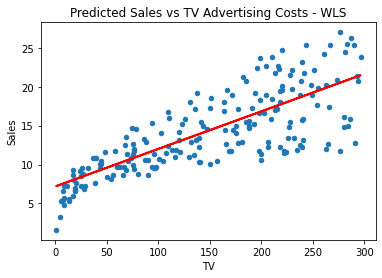

In [8]:
# Plot Penjualan yang diprediksi vs biaya Iklan TV 
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)
plt.title('Predicted Sales vs TV Advertising Costs - WLS')


### Sales dan Radio

In [9]:
advert['Radio']

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [10]:
nsample = len(advert.index)
w = np.ones(nsample)
w[nsample * 6 // 10 :] = 3

In [11]:
model2=smf.wls(formula='Sales~Radio',data=advert, weights=1.0 / (w ** 2)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            WLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.04e-21
Time:                        08:08:51   Log-Likelihood:                -608.00
No. Observations:                 200   AIC:                             1220.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2221      0.554     16.635      0.000       8.129      10.315
Radio          0.2131      0.020     10.812      0.000       0.174       0.252
==============================================================================
Omnibus:                       27.551   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.220
Skew:                          -0.791   Prob(JB):                     1.12e-09
Kurtosis:                       4.563   Cond. No.                         54.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sales_pred2=model2.predict(pd.DataFrame(advert['Radio']))
sales_pred2

0      17.278472
1      17.598171
2      19.004846
3      18.024436
4      11.523893
         ...    
195    10.010651
196    10.266411
197    11.204194
198    18.173629
199    11.055001
Length: 200, dtype: float64

In [13]:
# Hitung RMSE dan RSE untuk model 2 
advert['sales_pred2']=sales_pred2

# RMSE
advert['RSEd2']=(advert['Sales']-advert['sales_pred2'])**2
RSEd=advert.sum()['RSEd2']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
sales_pred_mean=np.mean(advert['sales_pred2'])
advert['RSEp2']=(sales_pred_mean-advert['sales_pred2'])**2
RSEp=advert.sum()['RSEp2']
RSE=RSEd/RSEp

sales_mean = np.mean(advert['Sales'])
error=RMSE/sales_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(4.259358830619907, 1.8209561815979103, 0.30375174402709265)

Text(0.5, 1.0, 'Predicted Sales vs Radio Advertising Costs - WLS')

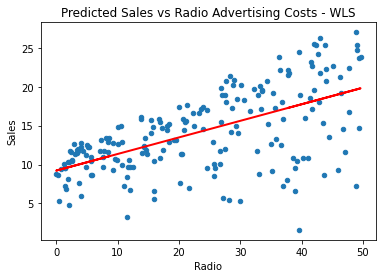

In [14]:
# Plot the Sales predicted vs TV Advertising costs
advert.plot(kind='scatter', x='Radio', y='Sales')
plt.plot(pd.DataFrame(advert['Radio']),sales_pred2,c='red',linewidth=2)
plt.title('Predicted Sales vs Radio Advertising Costs - WLS')

### Sales dan Newspaper

In [15]:
advert['Newspaper']

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64

In [16]:
nsample = len(advert.index)
w = np.ones(nsample)
w[nsample * 6 // 10 :] = 3

In [17]:
model3=smf.wls(formula='Sales~Newspaper',data=advert, weights=1.0 / (w ** 2)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.035
Model:                            WLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.203
Date:                Wed, 23 Mar 2022   Prob (F-statistic):            0.00789
Time:                        08:09:53   Log-Likelihood:                -650.82
No. Observations:                 200   AIC:                             1306.
Df Residuals:                     198   BIC:                             1312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9424      0.632     20.494      0.000      11.697      14.188
Newspaper      0.0430      0.016      2.684      0.008       0.011       0.075
==============================================================================
Omnibus:                        5.522   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.138
Skew:                           0.356   Prob(JB):                       0.0766
Kurtosis:                       3.333   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
sales_pred3=model3.predict(pd.DataFrame(advert['Newspaper']))
sales_pred3

0      15.920704
1      14.883469
2      15.925008
3      15.460189
4      15.455885
         ...    
195    13.536356
196    13.291035
197    13.217869
198    15.791588
199    13.316858
Length: 200, dtype: float64

In [19]:
# Hitung RMSE dan RSE untuk model 3 
advert['sales_pred3']=sales_pred3

# RMSE
advert['RSEd3']=(advert['Sales']-advert['sales_pred3'])**2
RSEd=advert.sum()['RSEd3']
RMSE=np.sqrt(RSEd/200)
#RSE=np.sqrt(RSEd/198) # # Df Residuals (n-p-1): 200-1-1 = 198 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
sales_pred_mean=np.mean(advert['sales_pred3'])
advert['RSEp3']=(sales_pred_mean-advert['sales_pred3'])**2
RSEp=advert.sum()['RSEp3']
RSE=RSEd/RSEp

sales_mean = np.mean(advert['Sales'])
error=RMSE/sales_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(5.078711812781711, 29.505540317838868, 0.3621830495832919)

Text(0.5, 1.0, 'Predicted Sales vs Newspaper Advertising Costs - WLS')

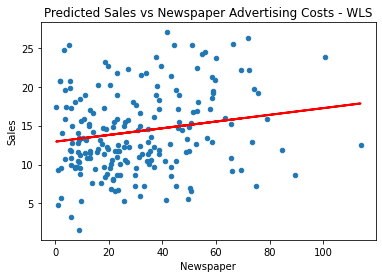

In [20]:
# Plot the Sales predicted vs TV Advertising costs
advert.plot(kind='scatter', x='Newspaper', y='Sales')
plt.plot(pd.DataFrame(advert['Newspaper']),sales_pred3,c='red',linewidth=2)
plt.title('Predicted Sales vs Newspaper Advertising Costs - WLS')